In [1]:
import pandas as pd
import numpy as np

## Data should be renamed as psam_p25_year.csv

In [2]:
# df_2014 = pd.read_csv('./psam_p25_2014.csv')
# df_2015 = pd.read_csv('./psam_p25_2015.csv')
df_2016 = pd.read_csv('./psam_p25_2016.csv')
df_2017 = pd.read_csv('./psam_p25_2017.csv')
df_2018 = pd.read_csv('./psam_p25_2018.csv')
df_2019 = pd.read_csv('./psam_p25_2019.csv')
df_2020 = pd.read_csv('./psam_p25_2020.csv')
df_2021 = pd.read_csv('./psam_p25_2021.csv')

C:\Users\85816\AppData\Local\Temp\ipykernel_18436\781117606.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv('./psam_p25_2018.csv')
C:\Users\85816\AppData\Local\Temp\ipykernel_18436\781117606.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019 = pd.read_csv('./psam_p25_2019.csv')
C:\Users\85816\AppData\Local\Temp\ipykernel_18436\781117606.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020 = pd.read_csv('./psam_p25_2020.csv')
C:\Users\85816\AppData\Local\Temp\ipykernel_18436\781117606.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021 = pd.read_csv('./psam_p25_2021.csv')


In [3]:
df_2021.dtypes

RT          object
SERIALNO    object
DIVISION     int64
SPORDER      int64
PUMA         int64
             ...  
PWGTP76      int64
PWGTP77      int64
PWGTP78      int64
PWGTP79      int64
PWGTP80      int64
Length: 287, dtype: object

In [4]:
# Delete rows in each DataFrame where the JWMNP column has a NaN value
# df_2014 = df_2014.dropna(subset=['JWMNP'])
# df_2015 = df_2015.dropna(subset=['JWMNP'])
df_2016 = df_2016.dropna(subset=['JWMNP'])
df_2017 = df_2017.dropna(subset=['JWMNP'])
df_2018 = df_2018.dropna(subset=['JWMNP'])
df_2019 = df_2019.dropna(subset=['JWMNP'])
df_2020 = df_2020.dropna(subset=['JWMNP'])
df_2021 = df_2021.dropna(subset=['JWMNP'])


In [5]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Initialize the StandardScaler


dataframes = {
    '2016': df_2016,
    '2017': df_2017,
    '2018': df_2018,
    '2019': df_2019,
    '2020': df_2020,
    '2021': df_2021
}

# required_columns = ['JWMNP', 'PUMA', 'RAC1P', 'AGEP', 'SCHL', 'WKW', 'SEX', 'OCCP', 'INDP']
required_columns = ['JWMNP','PUMA', 'RAC1P',  'AGEP', 'SCHL', 'WKW',"WAGP"]
# Check that each dataset contains all required columns and filter rows with JWTR or JWTRNS equal to 2
for year, df in dataframes.items():
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        raise ValueError(f"数据集{year}年缺少以下列: {missing_columns}")

    # If the JWTRNS column exists, it is used
    if 'JWTRNS' in df.columns:
        df['JWTR'] = df['JWTRNS']
    df = df[df['JWTR'] == 2]
    df=df[df['RAC1P'].isin([1,2])]

    # Filter out the rows that contain the required columns, and remove the rows that contain NaN from those columns
    df = df[required_columns].dropna(axis=1)
    df['Year'] = year

    dataframes[year] = df

# Combine data for all years
all_data = pd.concat(dataframes.values())
all_data['SCHL']=all_data['SCHL']

# Group by RAC1P, PUMA and Year, and calculate the average for each group
grouped_data = all_data.groupby(['RAC1P', 'PUMA', 'Year']).mean().reset_index()


grouped_data



,RAC1P,PUMA,Year,JWMNP,AGEP,SCHL,WKW,WAGP
0,1,100,2016,43.516129,32.741935,17.967742,2.612903,14767.096774
1,1,100,2017,46.419355,33.870968,17.612903,2.612903,23122.580645
2,1,100,2018,40.777778,33.333333,17.666667,2.666667,21774.074074
3,1,100,2019,41.392857,36.714286,17.535714,2.857143,26380.357143
4,1,100,2020,38.000000,38.555556,17.851852,2.851852,27142.592593
...,...,...,...,...,...,...,...,...
551,2,4800,2021,54.750000,30.250000,17.250000,3.250000,19775.000000
552,2,4903,2016,37.500000,39.000000,17.000000,3.500000,40250.000000
553,2,4903,2017,37.500000,39.000000,17.000000,3.500000,40250.000000
554,2,4903,2020,20.000000,34.000000,17.000000,1.000000,22600.000000


In [6]:
# Create subsets of RAC1P == 1 and RAC1P == 2, respectively
data_rac1p_1 = all_data[all_data['RAC1P'] == 1]
data_rac1p_2 = all_data[all_data['RAC1P'] == 2]

# Group by Year and PUMA, and calculate the average
grouped_rac1p_1 = data_rac1p_1.groupby(['Year', 'PUMA']).mean().reset_index()
grouped_rac1p_2 = data_rac1p_2.groupby(['Year', 'PUMA']).mean().reset_index()

# Combine results
grouped_data = pd.merge(grouped_rac1p_1, grouped_rac1p_2, on=['Year', 'PUMA'], suffixes=('_1', '_2'))

# Calculate the difference and traverse all columns
for col in grouped_rac1p_1.columns:
    if col not in ['Year', 'PUMA'] and col+'_1' in grouped_data and col+'_2' in grouped_data:
        grouped_data['D_' + col] = grouped_data[col + '_2'] - grouped_data[col + '_1']

# Keep only the columns beginning with Year, PUMA, and Difference
columns_to_keep =  [col for col in grouped_data.columns if col.startswith('D_')]
grouped_data = grouped_data[columns_to_keep]
grouped_data=grouped_data.drop("D_RAC1P",axis=1)

grouped_data


,D_JWMNP,D_AGEP,D_SCHL,D_WKW,D_WAGP
0,-23.516129,9.258065,1.032258,-1.612903,5232.903226
1,12.650943,-12.481132,-0.320755,-0.075472,-16795.283019
2,1.742965,-4.245130,0.821429,-0.073052,-295.811688
3,9.550000,-15.200000,-2.300000,3.250000,-15527.000000
4,-11.500000,-27.333333,-2.833333,2.166667,-20933.333333
...,...,...,...,...,...
240,-25.400000,-21.400000,-1.300000,0.700000,-38754.000000
241,-9.041667,-10.250000,-0.708333,-0.708333,-7512.500000
242,24.142857,-19.928571,2.000000,3.500000,-61128.571429
243,12.750000,-15.134615,-2.442308,1.865385,-64201.923077


In [7]:

df_filtered =grouped_data

X = df_filtered.drop('D_JWMNP', axis=1)
y = df_filtered['D_JWMNP'] 



#Use np.asarray to ensure that both X and y are appropriate arrays of numeric types
X_array = np.asarray(X, dtype=float)
y_array = np.asarray(y, dtype=float)

scaler = MinMaxScaler()

# Fit the scaler on the features, excluding the constant term and the dependent variable
X_array = scaler.fit_transform(X_array)


new_columns =list(X.columns)  # Adds 'const' to the beginning of the column name list
X = pd.DataFrame(X_array, columns=new_columns)
# Add a constant term (intercept) to the model

X_cons = sm.add_constant(X)
# Fit a linear regression model
model = sm.OLS(y_array, X_cons, missing='drop').fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     10.54
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           6.97e-08
Time:                        19:55:11   Log-Likelihood:                -1067.1
No. Observations:                 245   AIC:                             2144.
Df Residuals:                     240   BIC:                             2162.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.9475     12.573     -6.040      0.0

In [8]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


# Using sklearn's linear regression model
lin_reg_full = LinearRegression()
lin_reg_full.fit(X_cons, y_array)

# Feature selection using RFE
rfe_full = RFE(lin_reg_full, n_features_to_select=1)  # Adjust n_features_to_select as needed
rfe_full = rfe_full.fit(X_cons, y_array)

# Print selected features
print(f"Selected features: {X_cons.columns[rfe_full.support_]}")

# Filter columns using the boolean array 'rfe_full.support_'
X_selected_full = X_cons.loc[:, rfe_full.support_]

# Fit the model using only the selected features
lin_reg_full.fit(X_selected_full, y_array)

# For statsmodels, add a constant to the selected features
X_selected_full = sm.add_constant(X_selected_full)

# Fit the model using statsmodels
model_full = sm.OLS(y_array, X_selected_full).fit()

# Print the summary of the regression model
print(model_full.summary())


Selected features: Index(['D_SCHL'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     32.30
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.76e-08
Time:                        19:55:11   Log-Likelihood:                -1071.6
No. Observations:                 245   AIC:                             2147.
Df Residuals:                     243   BIC:                             2154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

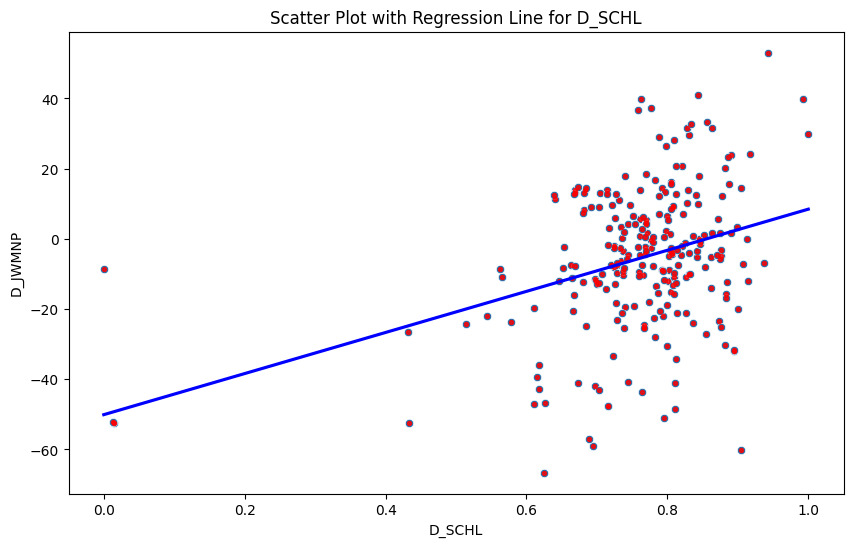

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['D_SCHL'], y=y)

# Adding a regression line
sns.regplot(x=X['D_SCHL'], y=y, ci=None, scatter_kws={'color':'red', 's':9}, line_kws={'color':'blue'})

plt.title(f'Scatter Plot with Regression Line for D_SCHL')
plt.xlabel('D_SCHL')
plt.ylabel('D_JWMNP')

plt.show()


In [10]:

data_rac1p_1 = all_data[all_data['RAC1P'] == 1]
data_rac1p_2 = all_data[all_data['RAC1P'] == 2]


grouped_rac1p_1 = data_rac1p_1.groupby(['Year', 'PUMA']).mean().reset_index()
grouped_rac1p_2 = data_rac1p_2.groupby(['Year', 'PUMA']).mean().reset_index()


grouped_data = pd.merge(grouped_rac1p_1, grouped_rac1p_2, on=['Year', 'PUMA'], suffixes=('_1', '_2'))

for col in grouped_rac1p_1.columns:
    if col not in ['Year', 'PUMA'] and col+'_1' in grouped_data and col+'_2' in grouped_data:
        grouped_data['D_' + col] = grouped_data[col + '_2'] - grouped_data[col + '_1']


columns_to_keep = ['Year', 'PUMA'] + [col for col in grouped_data.columns if col.startswith('D_')]
grouped_data = grouped_data[columns_to_keep]
grouped_data=grouped_data.drop("D_RAC1P",axis=1)

grouped_data=grouped_data[grouped_data['PUMA'].isin([3306,3900,3602])]
grouped_data=grouped_data[[ 'Year','PUMA','D_JWMNP','D_SCHL']]
grouped_data


,Year,PUMA,D_JWMNP,D_SCHL
25,2016,3306,-0.071429,0.406122
27,2016,3602,1.666667,1.400000
29,2016,3900,-40.857143,-1.785714
65,2017,3306,0.847087,0.224919
67,2017,3602,17.815126,0.403361
69,2017,3900,-43.562500,-1.375000
107,2018,3306,-1.472727,0.449091
110,2018,3602,20.654902,-0.121569
112,2018,3900,-48.509804,-0.333333
149,2019,3306,2.144521,-0.603969


In [11]:

average_age_commute_by_puma_race = grouped_data.groupby(['PUMA']).agg(
    # average_D_WKW=('D_WKW', 'mean'),
    average_D_SCHL=('D_SCHL', 'mean'),
    average_D_JWMNP=('D_JWMNP', 'mean')
).reset_index()

# average_age_commute_by_puma_race_sorted = average_age_commute_by_puma_race.sort_values('average_age')

average_age_commute_by_puma_race



,PUMA,average_D_SCHL,average_D_JWMNP
0,3306,-0.242531,0.431524
1,3602,-0.236028,23.938863
2,3900,-2.832550,-38.260798
